In [96]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Clustering Non-PySpark**

# Data *Sintesis*
Uji Pertama (30 data)

In [ ]:
#K-Means Clustering
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Importing the E-Commerce Customer Dataset with pandas

dataset = pd.read_csv('Cust_Segmen.csv')
x = dataset.iloc[0:30,[5,6]].values
dataset.head(10)


No  Gender  Usia  ...  Kategori Barang   Nilai Transaksi (K Rp)  Rating
0   1    pria    18  ...                1                     3500       4
1   2  wanita    19  ...                2                       60       4
2   3    pria    20  ...                4                       54       3
3   4    pria    21  ...                2                      100       4
4   5  wanita    20  ...                2                      120       3
5   6    pria    35  ...                1                     1200       2
6   7  wanita    15  ...                2                       95       2
7   8  wanita    18  ...                5                      250       2
8   9  wanita    39  ...                2                      150       3
9  10  wanita    45  ...                4                       70       4

[10 rows x 7 columns]

In [ ]:
#Using elbow method to find the optimal number of cluster
from sklearn.cluster import KMeans
wcss = []
for i in range (1,11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter =300, n_init = 10, random_state = 0)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)

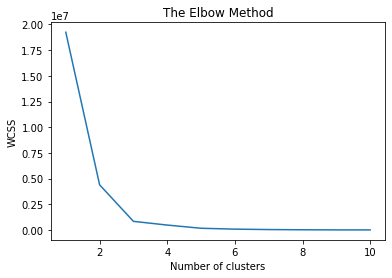

In [ ]:
# Plot the graph to visualize the Elbow Method to find the optimal number of cluster  
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

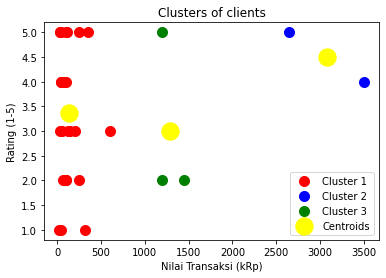

--- Waktu Komputasi: 3.314018249511719e-05 seconds ---
silhouette score =  0.8464698050585415


In [ ]:
# Applying KMeans to the dataset with the optimal number of cluster

kmeans=KMeans(n_clusters= 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

# Visualising the clusters

plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0,1],s = 100, c='red', label = 'Cluster 1')

plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1,1],s = 100, c='blue', label = 'Cluster 2')

plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2,1],s = 100, c='green', label = 'Cluster 3')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 300, c = 'yellow', label = 'Centroids')
    
plt.title('Clusters of clients')
plt.xlabel('Nilai Transaksi (kRp)')
plt.ylabel('Rating (1-5)')
plt.legend()
plt.show()

import time
from sklearn.metrics import silhouette_score

start_time = time.time()
print("--- Waktu Komputasi: %s seconds ---" % (time.time() - start_time))

score = silhouette_score(x, kmeans.labels_, metric='euclidean')
print('silhouette score = ', score)


Uji Kedua (50 data)

In [ ]:
#Importing the E-Commerce Customer Dataset with pandas

x2 = dataset.iloc[0:50,[5,6]].values
dataset.head(10)

No  Gender  Usia  ...  Kategori Barang   Nilai Transaksi (K Rp)  Rating
0   1    pria    18  ...                1                     3500       4
1   2  wanita    19  ...                2                       60       4
2   3    pria    20  ...                4                       54       3
3   4    pria    21  ...                2                      100       4
4   5  wanita    20  ...                2                      120       3
5   6    pria    35  ...                1                     1200       2
6   7  wanita    15  ...                2                       95       2
7   8  wanita    18  ...                5                      250       2
8   9  wanita    39  ...                2                      150       3
9  10  wanita    45  ...                4                       70       4

[10 rows x 7 columns]

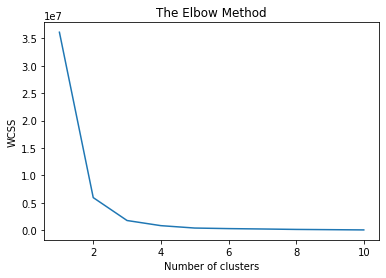

In [ ]:
#Using elbow method to find the optimal number of cluster
from sklearn.cluster import KMeans
wcss = []
for i in range (1,11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter =300, n_init = 10, random_state = 0)
  kmeans.fit(x2)
  wcss.append(kmeans.inertia_)
# Plot the graph to visualize the Elbow Method to find the optimal number of cluster  
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

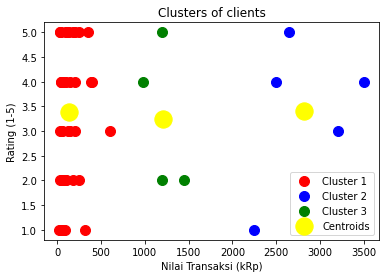

--- Waktu Komputasi: 4.8160552978515625e-05 seconds ---
silhouette score =  0.8336789267464603


In [ ]:
# Applying KMeans to the dataset with the optimal number of cluster

kmeans=KMeans(n_clusters= 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans2 = kmeans.fit_predict(x2)

# Visualising the clusters

plt.scatter(x2[y_kmeans2 == 0, 0], x2[y_kmeans2 == 0,1],s = 100, c='red', label = 'Cluster 1')

plt.scatter(x2[y_kmeans2 == 1, 0], x2[y_kmeans2 == 1,1],s = 100, c='blue', label = 'Cluster 2')

plt.scatter(x2[y_kmeans2 == 2, 0], x2[y_kmeans2 == 2,1],s = 100, c='green', label = 'Cluster 3')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 300, c = 'yellow', label = 'Centroids')
    
plt.title('Clusters of clients')
plt.xlabel('Nilai Transaksi (kRp)')
plt.ylabel('Rating (1-5)')
plt.legend()
plt.show()

import time
from sklearn.metrics import silhouette_score

start_time = time.time()
print("--- Waktu Komputasi: %s seconds ---" % (time.time() - start_time))

score = silhouette_score(x2, kmeans.labels_, metric='euclidean')
print('silhouette score = ', score)

# Data *Real Case*
Uji Pertama (1.000 dari 45.211 Data)

In [ ]:
dataset_2 = pd.read_csv('bank_cust.csv')
x3 = dataset_2.iloc[0:1000,[4,5]].values #fitur yang dicluster: age dan balance
dataset_2.head(10)

job   marital  education default  ...  pdays  previous poutcome   y
0    management   married   tertiary      no  ...     -1         0  unknown  no
1    technician    single  secondary      no  ...     -1         0  unknown  no
2  entrepreneur   married  secondary      no  ...     -1         0  unknown  no
3   blue-collar   married    unknown      no  ...     -1         0  unknown  no
4       unknown    single    unknown      no  ...     -1         0  unknown  no
5    management   married   tertiary      no  ...     -1         0  unknown  no
6    management    single   tertiary      no  ...     -1         0  unknown  no
7  entrepreneur  divorced   tertiary     yes  ...     -1         0  unknown  no
8       retired   married    primary      no  ...     -1         0  unknown  no
9    technician    single  secondary      no  ...     -1         0  unknown  no

[10 rows x 17 columns]

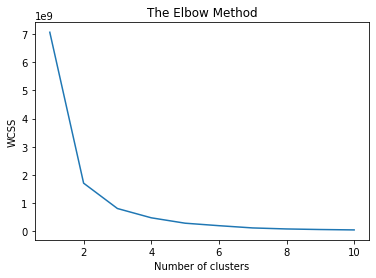

In [ ]:
#Using elbow method to find the optimal number of cluster
from sklearn.cluster import KMeans
wcss = []
for i in range (1,11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter =300, n_init = 10, random_state = 0)
  kmeans.fit(x3)
  wcss.append(kmeans.inertia_)
# Plot the graph to visualize the Elbow Method to find the optimal number of cluster  
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

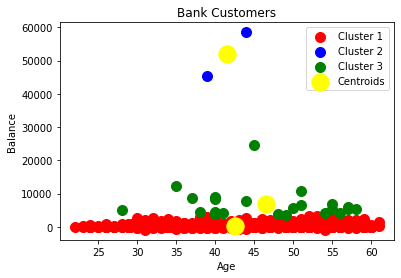

--- Waktu Komputasi: 4.076957702636719e-05 seconds ---
silhouette score =  0.9076295923500572


In [ ]:
# Applying KMeans to the dataset with the optimal number of cluster

kmeans=KMeans(n_clusters= 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans3 = kmeans.fit_predict(x3)


# Visualising the clusters

plt.scatter(x3[y_kmeans3 == 0, 0], x3[y_kmeans3 == 0,1],s = 100, c='red', label = 'Cluster 1')

plt.scatter(x3[y_kmeans3 == 1, 0], x3[y_kmeans3 == 1,1],s = 100, c='blue', label = 'Cluster 2')

plt.scatter(x3[y_kmeans3 == 2, 0], x3[y_kmeans3 == 2,1],s = 100, c='green', label = 'Cluster 3')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 300, c = 'yellow', label = 'Centroids')
    
plt.title('Bank Customers')
plt.xlabel('Age')
plt.ylabel('Balance')
plt.legend()
plt.show()

import time
from sklearn.metrics import silhouette_score

start_time = time.time()
print("--- Waktu Komputasi: %s seconds ---" % (time.time() - start_time))

score = silhouette_score(x3, kmeans.labels_, metric='euclidean')
print('silhouette score = ', score)

 Uji Kedua (45.211 Data)

In [203]:
dataset_2 = pd.read_csv('bank_cust.csv')
x4 = dataset_2.iloc[:,[4,5]].values #fitur yang dicluster: age dan balance

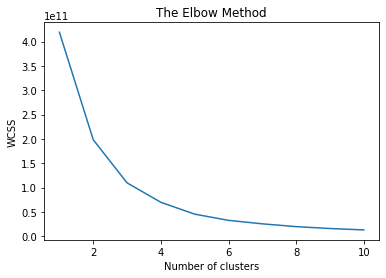

In [204]:
#Using elbow method to find the optimal number of cluster
from sklearn.cluster import KMeans
wcss = []
for i in range (1,11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter =300, n_init = 10, random_state = 0)
  kmeans.fit(x4)
  wcss.append(kmeans.inertia_)
# Plot the graph to visualize the Elbow Method to find the optimal number of cluster  
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

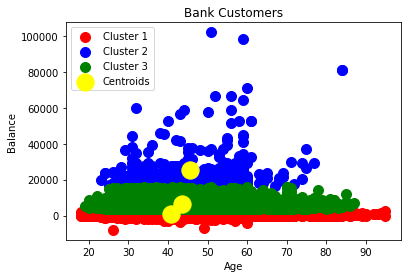

silhouette score =  0.78813277067922
--- Waktu Komputasi: 4.1484832763671875e-05 seconds ---


In [207]:
# Applying KMeans to the dataset with the optimal number of cluster

kmeans=KMeans(n_clusters= 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans4 = kmeans.fit_predict(x4)

# Visualising the clusters

plt.scatter(x4[y_kmeans4 == 0, 0], x4[y_kmeans4 == 0,1],s = 100, c='red', label = 'Cluster 1')

plt.scatter(x4[y_kmeans4 == 1, 0], x4[y_kmeans4 == 1,1],s = 100, c='blue', label = 'Cluster 2')

plt.scatter(x4[y_kmeans4 == 2, 0], x4[y_kmeans4 == 2,1],s = 100, c='green', label = 'Cluster 3')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 300, c = 'yellow', label = 'Centroids')
    
plt.title('Bank Customers')
plt.xlabel('Age')
plt.ylabel('Balance')
plt.legend()
plt.show()

import time
from sklearn.metrics import silhouette_score

score = silhouette_score(x4, kmeans.labels_, metric='euclidean')
print('silhouette score = ', score)

start_time = time.time()
print("--- Waktu Komputasi: %s seconds ---" % (time.time() - start_time))

# **Clustering with PySpark**

In [97]:
import os
os.chdir("/content/drive/My Drive")
path = "Cisco Big Data Using Python 2021/FGA Big Data Using Python - Kelas B - utk Peserta/Sesi 1 - 25 Python"
if not os.path.exists(path):
    os.makedirs(path)
os.chdir("/content/drive/My Drive/Cisco Big Data Using Python 2021/FGA Big Data Using Python - Kelas B - utk Peserta/Sesi 1 - 25 Python")
if not os.path.exists("images"):
  !wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1-A9hoqmtpKWBAu_QjyqUxpcuBXkJ-Gk8' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1-A9hoqmtpKWBAu_QjyqUxpcuBXkJ-Gk8" -O 'images.tar' && rm -rf /tmp/cookies.txt
  !tar -xv -C './' -f './images.tar'

In [111]:
!pwd
!ls

/content/drive/My Drive/Cisco Big Data Using Python 2021/FGA Big Data Using Python - Kelas B - utk Peserta/Sesi 1 - 25 Python
flask-sqlite			 spark-2.4.1-bin-hadoop2.7.tgz.2
images				 spark-2.4.1-bin-hadoop2.7.tgz.3
images.tar			 spark-2.4.1-bin-hadoop2.7.tgz.4
index.html			 spark-2.4.1-bin-hadoop2.7.tgz.5
Latihan_Python			 spark-2.4.1-bin-hadoop2.7.tgz.6
spark-2.4.1-bin-hadoop2.7	 spark-2.4.1-bin-hadoop2.7.tgz.7
spark-2.4.1-bin-hadoop2.7.tgz	 spark-3.0.0-bin-hadoop2.7
spark-2.4.1-bin-hadoop2.7.tgz.1  spark-3.0.0-bin-hadoop2.7.tgz


In [113]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://archive.apache.org/dist/spark/spark-2.4.1/spark-2.4.1-bin-hadoop2.7.tgz
!tar xf spark-2.4.1-bin-hadoop2.7.tgz
!pip install -q findspark

import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "./spark-2.4.1-bin-hadoop2.7"

import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()

spark
!jps

1859 SparkSubmit
1927 Jps


In [114]:
import pyspark
from pyspark.context import SparkContext
spark = SparkSession\
        .builder\
        .appName("Clustering_kelompok1")\
        .getOrCreate()
        
#sc = SparkContext.getOrCreate()
sc = spark.sparkContext
sc

<SparkContext master=local[*] appName=pyspark-shell>

In [222]:
# Data Frame spark profiling 
from pyspark.sql.types import IntegerType, StringType, DoubleType, ShortType, DecimalType
import pyspark.sql.functions as func
from pyspark.sql.functions import isnull
from pyspark.sql.functions import isnan, when, count, col, round
from pyspark.sql.functions import mean
from pyspark.sql.types import Row
import matplotlib.pyplot as plt
from pyspark.sql.functions import udf


# Pandas DF operation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import array

# Modeling + Evaluation
from pyspark.ml.feature import VectorAssembler, VectorIndexer, OneHotEncoder, StringIndexer
from pyspark.sql.functions import when
from pyspark.sql import functions as F
from pyspark.sql.functions import avg
from pyspark.ml import Pipeline
from pyspark.ml.clustering import KMeans
from pyspark.ml.feature import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
from pyspark.ml.evaluation import ClusteringEvaluator

# Data Sintesis

In [115]:
from google.colab import files
files.upload()

Saving Cust_Segmen.csv to Cust_Segmen.csv


{'Cust_Segmen.csv': b'No,Gender,Usia,Daerah Asal,Kategori Barang, Nilai Transaksi (K Rp),Rating\r\n1,pria,18,2,1,3500,4\r\n2,wanita,19,4,2,60,4\r\n3,pria,20,3,4,54,3\r\n4,pria,21,3,2,100,4\r\n5,wanita,20,2,2,120,3\r\n6,pria,35,1,1,1200,2\r\n7,wanita,15,6,2,95,2\r\n8,wanita,18,5,5,250,2\r\n9,wanita,39,4,2,150,3\r\n10,wanita,45,4,4,70,4\r\n11,pria,14,3,3,35,3\r\n12,pria,14,2,3,40,1\r\n13,wanita,30,1,3,28,5\r\n14,pria,32,1,3,38,4\r\n15,wanita,19,4,5,200,3\r\n16,wanita,24,2,3,65,2\r\n17,pria,25,2,1,600,3\r\n18,pria,15,2,2,250,5\r\n19,pria,17,3,1,100,2\r\n20,wanita,24,6,2,320,1\r\n21,wanita,33,5,2,115,5\r\n22,wanita,42,4,3,25,1\r\n23,pria,20,5,4,27,5\r\n24,wanita,30,2,1,1200,5\r\n25,wanita,42,7,2,350,5\r\n26,pria,24,2,3,45,5\r\n27,pria,15,7,3,45,4\r\n28,pria,33,5,2,95,5\r\n29,pria,26,3,1,2650,5\r\n30,pria,25,4,1,1450,2\r\n31,wanita,25,4,2,200,4\r\n32,wanita,34,5,5,380,4\r\n33,pria,45,5,1,3200,3\r\n34,wanita,21,1,1,2500,4\r\n35,wanita,22,6,3,70,1\r\n36,pria,23,7,5,180,2\r\n37,wanita,16,3,5,4

In [267]:
file_type = 'text'
path=r'Cust_Segmen.csv'
delimeter=','

In [268]:
def load_data(file_type):
    """input type of file "text" or "parquet" and Return pyspark dataframe"""
    if file_type =="text": # use text as file type input
        df = spark.read.option("header", "true") \
        .option("delimeter",delimeter)\
        .option("inferSchema", "true") \
        .csv(path) 
    else:  
        df= spark.read.parquet("example.parquet") #path file that you want import
    return df

In [269]:
df = load_data(file_type)
df.show(15)

+---+------+----+-----------+---------------+-----------------------+------+
| No|Gender|Usia|Daerah Asal|Kategori Barang| Nilai Transaksi (K Rp)|Rating|
+---+------+----+-----------+---------------+-----------------------+------+
|  1|  pria|  18|          2|              1|                   3500|     4|
|  2|wanita|  19|          4|              2|                     60|     4|
|  3|  pria|  20|          3|              4|                     54|     3|
|  4|  pria|  21|          3|              2|                    100|     4|
|  5|wanita|  20|          2|              2|                    120|     3|
|  6|  pria|  35|          1|              1|                   1200|     2|
|  7|wanita|  15|          6|              2|                     95|     2|
|  8|wanita|  18|          5|              5|                    250|     2|
|  9|wanita|  39|          4|              2|                    150|     3|
| 10|wanita|  45|          4|              4|                     70|     4|

In [270]:
df.printSchema()

root
 |-- No: integer (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Usia: integer (nullable = true)
 |-- Daerah Asal: integer (nullable = true)
 |-- Kategori Barang: integer (nullable = true)
 |--  Nilai Transaksi (K Rp): integer (nullable = true)
 |-- Rating: integer (nullable = true)



In [271]:
#rename column name
df=df.withColumnRenamed(' Nilai Transaksi (K Rp)','Trans_val')
df=df.withColumnRenamed('Rating','Rate')

len(df.columns), df.columns

(7,
 ['No',
  'Gender',
  'Usia',
  'Daerah Asal',
  'Kategori Barang',
  'Trans_val',
  'Rate'])

In [272]:
#Categorical and numerical variable

cat_cols = [item[0] for item in df.dtypes if item[1].startswith('string')] #just will select string data type
print("cat_cols:", cat_cols)
num_cols = [item[0] for item in df.dtypes if item[1].startswith('int') | item[1].startswith('double')] #just will select integer or double data type
print("num_cols:", num_cols)

cat_cols: ['Gender']
num_cols: ['No', 'Usia', 'Daerah Asal', 'Kategori Barang', 'Trans_val', 'Rate']


In [273]:
df.select(num_cols).describe().show()

+-------+------------------+----------------+------------------+-----------------+-----------------+------------------+
|summary|                No|            Usia|       Daerah Asal|  Kategori Barang|        Trans_val|              Rate|
+-------+------------------+----------------+------------------+-----------------+-----------------+------------------+
|  count|                50|              50|                50|               50|               50|                50|
|   mean|              25.5|           26.04|              3.72|             2.72|           491.14|              3.38|
| stddev|14.577379737113251|8.78533100209244|1.7847425927704474|1.325418686256366|858.3297499165673|1.3685982699425703|
|    min|                 1|              14|                 1|                1|               25|                 1|
|    max|                50|              45|                 7|                5|             3500|                 5|
+-------+------------------+------------

In [274]:
features = ('Trans_val', 'Rate')
assembler = VectorAssembler(inputCols=features,outputCol="features")

In [237]:
dataset=assembler.transform(df)
dataset.select("features").show(truncate=False)

+------------+
|features    |
+------------+
|[3500.0,4.0]|
|[60.0,4.0]  |
|[54.0,3.0]  |
|[100.0,4.0] |
|[120.0,3.0] |
|[1200.0,2.0]|
|[95.0,2.0]  |
|[250.0,2.0] |
|[150.0,3.0] |
|[70.0,4.0]  |
|[35.0,3.0]  |
|[40.0,1.0]  |
|[28.0,5.0]  |
|[38.0,4.0]  |
|[200.0,3.0] |
|[65.0,2.0]  |
|[600.0,3.0] |
|[250.0,5.0] |
|[100.0,2.0] |
|[320.0,1.0] |
+------------+
only showing top 20 rows



In [275]:
cost= np.zeros(20)
for k in range(2,20):
  kmeans = KMeans().setK(k).setSeed(1).setFeaturesCol("features")
  model = kmeans.fit(dataset)
  cost[k] = model.computeCost(dataset)


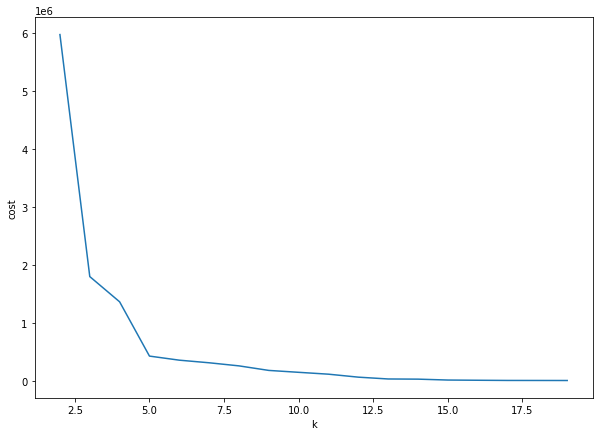

In [276]:
#Plot the cost
fig, ax = plt.subplots(1,1, figsize=(10,7))
ax.plot(range(2,20), cost[2:20])
ax.set_xlabel('k')
ax.set_ylabel('cost')
plt.show()

In [277]:
k = 3
kmeans = KMeans().setK(k).setSeed(1).setFeaturesCol("features")
model = kmeans.fit(dataset)
centers = model.clusterCenters()

print("Cluster Centers: ")
for center in centers:
    print(center)

#transfrom model to dataset
test=model.transform(dataset)

#Assign cluster to the event in data
prediction= model.transform(dataset).select(*num_cols,*cat_cols, 'prediction').collect()

#create dataframe 
prediction=spark.createDataFrame(prediction)
prediction.show()

import time

start_time = time.time()
print("--- Waktu Komputasi: %s seconds ---" % (time.time() - start_time))

evaluator = ClusteringEvaluator()
silhouette = evaluator.evaluate(predictions)
print("Silhouette with squared euclidean distance = ", silhouette)

Cluster Centers: 
[2820.     3.4]
[137.24390244   3.3902439 ]
[1207.5     3.25]
+---+----+-----------+---------------+---------+----+------+----------+
| No|Usia|Daerah Asal|Kategori Barang|Trans_val|Rate|Gender|prediction|
+---+----+-----------+---------------+---------+----+------+----------+
|  1|  18|          2|              1|     3500|   4|  pria|         0|
|  2|  19|          4|              2|       60|   4|wanita|         1|
|  3|  20|          3|              4|       54|   3|  pria|         1|
|  4|  21|          3|              2|      100|   4|  pria|         1|
|  5|  20|          2|              2|      120|   3|wanita|         1|
|  6|  35|          1|              1|     1200|   2|  pria|         2|
|  7|  15|          6|              2|       95|   2|wanita|         1|
|  8|  18|          5|              5|      250|   2|wanita|         1|
|  9|  39|          4|              2|      150|   3|wanita|         1|
| 10|  45|          4|              4|       70|   4|wan

In [278]:
#grouping by cluster prediction
prediction.groupBy('prediction').count().show()

+----------+-----+
|prediction|count|
+----------+-----+
|         0|    5|
|         1|   41|
|         2|    4|
+----------+-----+



In [279]:
pred_pd=prediction.toPandas().set_index('No')

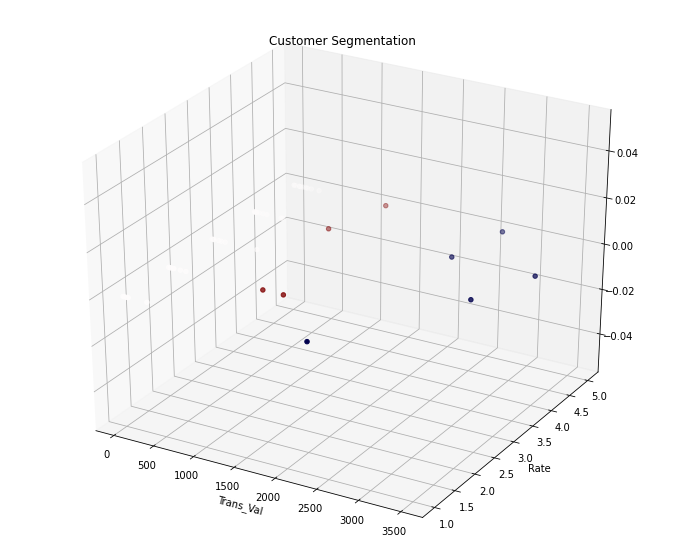

In [280]:
#Create 3d visualization
threedee = plt.figure(figsize=(12,10)).gca(projection='3d')
threedee.scatter(pred_pd.Trans_val, pred_pd.Rate, c=pred_pd.prediction, cmap="seismic")
threedee.set_title('Customer Segmentation')
threedee.set_xlabel('Trans_Val')
threedee.set_ylabel('Rate')
plt.show()

# Data Real Case

In [202]:
from google.colab import files
files.upload()

Saving bank_cust.csv to bank_cust.csv


{'bank_cust.csv': b'job,marital,education,default,age,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y\r\nmanagement,married,tertiary,no,58,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no\r\ntechnician,single,secondary,no,44,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no\r\nentrepreneur,married,secondary,no,33,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no\r\nblue-collar,married,unknown,no,47,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no\r\nunknown,single,unknown,no,33,1,no,no,unknown,5,may,198,1,-1,0,unknown,no\r\nmanagement,married,tertiary,no,35,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no\r\nmanagement,single,tertiary,no,28,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no\r\nentrepreneur,divorced,tertiary,yes,42,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no\r\nretired,married,primary,no,58,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no\r\ntechnician,single,secondary,no,43,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no\r\nadmin.,divorced,secondary,no,41

In [281]:
file_type = 'text'
path=r'bank_cust.csv'
delimeter=','

In [282]:
def load_data(file_type):
    """input type of file "text" or "parquet" and Return pyspark dataframe"""
    if file_type =="text": # use text as file type input
        df = spark.read.option("header", "true") \
        .option("delimeter",delimeter)\
        .option("inferSchema", "true") \
        .csv(path) 
    else:  
        df= spark.read.parquet("example.parquet") #path file that you want import
    return df

In [283]:
df_2 = load_data(file_type)
df_2.show(10)

+------------+--------+---------+-------+---+-------+-------+----+-------+---+-----+--------+--------+-----+--------+--------+---+
|         job| marital|education|default|age|balance|housing|loan|contact|day|month|duration|campaign|pdays|previous|poutcome|  y|
+------------+--------+---------+-------+---+-------+-------+----+-------+---+-----+--------+--------+-----+--------+--------+---+
|  management| married| tertiary|     no| 58|   2143|    yes|  no|unknown|  5|  may|     261|       1|   -1|       0| unknown| no|
|  technician|  single|secondary|     no| 44|     29|    yes|  no|unknown|  5|  may|     151|       1|   -1|       0| unknown| no|
|entrepreneur| married|secondary|     no| 33|      2|    yes| yes|unknown|  5|  may|      76|       1|   -1|       0| unknown| no|
| blue-collar| married|  unknown|     no| 47|   1506|    yes|  no|unknown|  5|  may|      92|       1|   -1|       0| unknown| no|
|     unknown|  single|  unknown|     no| 33|      1|     no|  no|unknown|  5|  may

In [284]:
df_2.printSchema()

root
 |-- job: string (nullable = true)
 |-- marital: string (nullable = true)
 |-- education: string (nullable = true)
 |-- default: string (nullable = true)
 |-- age: integer (nullable = true)
 |-- balance: integer (nullable = true)
 |-- housing: string (nullable = true)
 |-- loan: string (nullable = true)
 |-- contact: string (nullable = true)
 |-- day: integer (nullable = true)
 |-- month: string (nullable = true)
 |-- duration: integer (nullable = true)
 |-- campaign: integer (nullable = true)
 |-- pdays: integer (nullable = true)
 |-- previous: integer (nullable = true)
 |-- poutcome: string (nullable = true)
 |-- y: string (nullable = true)



In [285]:
len(df_2.columns), df_2.columns

(17,
 ['job',
  'marital',
  'education',
  'default',
  'age',
  'balance',
  'housing',
  'loan',
  'contact',
  'day',
  'month',
  'duration',
  'campaign',
  'pdays',
  'previous',
  'poutcome',
  'y'])

In [286]:
#Categorical and numerical variable

cat_cols = [item[0] for item in df_2.dtypes if item[1].startswith('string')] #just will select string data type
print("cat_cols:", cat_cols)
num_cols = [item[0] for item in df_2.dtypes if item[1].startswith('int') | item[1].startswith('double')] #just will select integer or double data type
print("num_cols:", num_cols)

cat_cols: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']
num_cols: ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


In [287]:
df_2.select(num_cols).describe().show()

+-------+------------------+------------------+-----------------+-----------------+-----------------+------------------+------------------+
|summary|               age|           balance|              day|         duration|         campaign|             pdays|          previous|
+-------+------------------+------------------+-----------------+-----------------+-----------------+------------------+------------------+
|  count|             45211|             45211|            45211|            45211|            45211|             45211|             45211|
|   mean| 40.93621021432837|1362.2720576850766|15.80641879188693|258.1630797814691|2.763840658246887| 40.19782796222158|0.5803233726305546|
| stddev|10.618762040975405|3044.7658291685257|8.322476153044594|257.5278122651706|3.098020883279192|100.12874599059828| 2.303441044931218|
|    min|                18|             -8019|                1|                0|                1|                -1|                 0|
|    max|           

In [288]:
features = ('age', 'balance')
assembler = VectorAssembler(inputCols=features,outputCol="features")

In [289]:
dataset3=assembler.transform(df_2)
dataset3.select("features").show(truncate=False)

+-------------+
|features     |
+-------------+
|[58.0,2143.0]|
|[44.0,29.0]  |
|[33.0,2.0]   |
|[47.0,1506.0]|
|[33.0,1.0]   |
|[35.0,231.0] |
|[28.0,447.0] |
|[42.0,2.0]   |
|[58.0,121.0] |
|[43.0,593.0] |
|[41.0,270.0] |
|[29.0,390.0] |
|[53.0,6.0]   |
|[58.0,71.0]  |
|[57.0,162.0] |
|[51.0,229.0] |
|[45.0,13.0]  |
|[57.0,52.0]  |
|[60.0,60.0]  |
|[33.0,0.0]   |
+-------------+
only showing top 20 rows



In [290]:
cost= np.zeros(20)
for k in range(2,20):
  kmeans = KMeans().setK(k).setSeed(1).setFeaturesCol("features")
  model = kmeans.fit(dataset3)
  cost[k] = model.computeCost(dataset3)

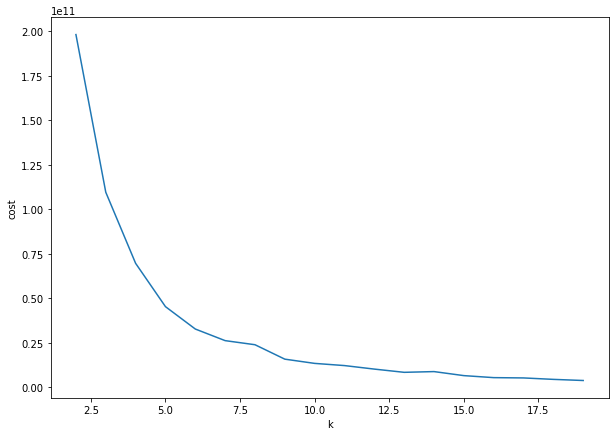

In [291]:
#Plot the cost
fig, ax = plt.subplots(1,1, figsize=(10,7))
ax.plot(range(2,20), cost[2:20])
ax.set_xlabel('k')
ax.set_ylabel('cost')
plt.show()

In [308]:
k = 8
kmeans = KMeans().setK(k).setSeed(1).setFeaturesCol("features")
model = kmeans.fit(dataset3)
centers = model.clusterCenters()

print("Cluster Centers: ")
for center in centers:
    print(center)

#transfrom model to dataset
test=model.transform(dataset3)

#Assign cluster to the event in data
prediction1= model.transform(dataset3).select(*num_cols,*cat_cols, 'prediction').collect()

#create dataframe 
prediction1=spark.createDataFrame(prediction1)
prediction1.show()

import time

start_time = time.time()
print("--- Waktu Komputasi: %s seconds ---" % (time.time() - start_time))

evaluator = ClusteringEvaluator()
silhouette = evaluator.evaluate(predictions)
print("Silhouette with squared euclidean distance = ", silhouette)

Cluster Centers: 
[ 40.14923283 274.39083751]
[  43.47799353 5194.24627832]
[   44.77272727 20938.59090909]
[   43.30973451 10464.06293019]
[5.50000e+01 1.00272e+05]
[   48.66666667 39477.76923077]
[  42.49636133 2089.6832621 ]
[5.63636364e+01 6.57003636e+04]
+---+-------+---+--------+--------+-----+--------+------------+--------+---------+-------+-------+----+-------+-----+--------+---+----------+
|age|balance|day|duration|campaign|pdays|previous|         job| marital|education|default|housing|loan|contact|month|poutcome|  y|prediction|
+---+-------+---+--------+--------+-----+--------+------------+--------+---------+-------+-------+----+-------+-----+--------+---+----------+
| 58|   2143|  5|     261|       1|   -1|       0|  management| married| tertiary|     no|    yes|  no|unknown|  may| unknown| no|         6|
| 44|     29|  5|     151|       1|   -1|       0|  technician|  single|secondary|     no|    yes|  no|unknown|  may| unknown| no|         0|
| 33|      2|  5|      76|    

In [299]:
#grouping by cluster prediction
prediction1.groupBy('prediction').count().show()

+----------+-----+
|prediction|count|
+----------+-----+
|         0|32125|
|         7|   11|
|         6| 8657|
|         5|   39|
|         1| 3094|
|         3| 1019|
|         2|  264|
|         4|    2|
+----------+-----+



In [261]:
pred_pd2=prediction1.toPandas().set_index('job')

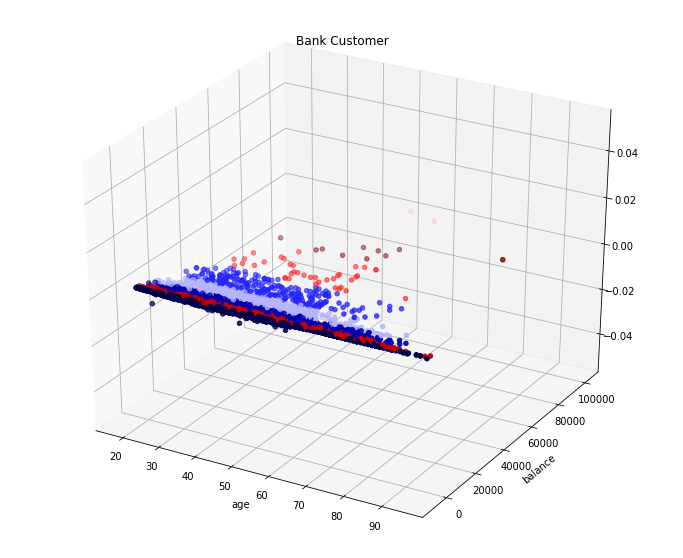

In [264]:
#Create 3d visualization
threedee = plt.figure(figsize=(12,10)).gca(projection='3d')
threedee.scatter(pred_pd2.age, pred_pd2.balance, c=pred_pd2.prediction, cmap="seismic")
threedee.set_title('Bank Customer')
threedee.set_xlabel('age')
threedee.set_ylabel('balance')
plt.show()